In [1]:
import pandas as pd
import numpy as np

In [2]:
# Standard imports for scrpaing
from requests import get
from bs4 import BeautifulSoup
import os



# Used to run selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [3]:
import json

In [4]:
from nba_api.stats.endpoints import playercareerstats


In [5]:
url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=PerGame&Scope=S&Season=2022-23&SeasonType=Regular%20Season&StatCategory=PTS'
# headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}
response = get(url).json()


In [6]:
response

{'resource': 'leagueleaders',
 'parameters': {'LeagueID': '00',
  'PerMode': 'PerGame',
  'StatCategory': 'PTS',
  'Season': '2022-23',
  'SeasonType': 'Regular Season',
  'Scope': 'S',
  'ActiveFlag': None},
 'resultSet': {'name': 'LeagueLeaders',
  'headers': ['PLAYER_ID',
   'RANK',
   'PLAYER',
   'TEAM_ID',
   'TEAM',
   'GP',
   'MIN',
   'FGM',
   'FGA',
   'FG_PCT',
   'FG3M',
   'FG3A',
   'FG3_PCT',
   'FTM',
   'FTA',
   'FT_PCT',
   'OREB',
   'DREB',
   'REB',
   'AST',
   'STL',
   'BLK',
   'TOV',
   'PTS',
   'EFF'],
  'rowSet': [[203954,
    1,
    'Joel Embiid',
    1610612755,
    'PHI',
    66,
    34.6,
    11.0,
    20.1,
    0.548,
    1.0,
    3.0,
    0.33,
    10.0,
    11.7,
    0.857,
    1.7,
    8.4,
    10.2,
    4.2,
    1.0,
    1.7,
    3.4,
    33.1,
    35.9],
   [1629029,
    2,
    'Luka Doncic',
    1610612742,
    'DAL',
    66,
    36.2,
    10.9,
    22.0,
    0.496,
    2.8,
    8.2,
    0.342,
    7.8,
    10.5,
    0.742,
    0.8,
    7.8,
 

In [7]:
df = pd.DataFrame(response['resultSet']['rowSet'], columns = response['resultSet']['headers'])
df

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,203954,1,Joel Embiid,1610612755,PHI,66,34.6,11.0,20.1,0.548,...,0.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,33.1,35.9
1,1629029,2,Luka Doncic,1610612742,DAL,66,36.2,10.9,22.0,0.496,...,0.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,32.4,33.5
2,203081,3,Damian Lillard,1610612757,POR,58,36.3,9.6,20.7,0.463,...,0.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,32.2,30.2
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,35.5,10.4,20.3,0.510,...,0.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,31.4,30.5
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,32.1,11.2,20.3,0.553,...,0.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,31.1,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,200782,241,P.J. Tucker,1610612755,PHI,75,25.6,1.3,3.0,0.427,...,0.826,1.3,2.7,3.9,0.8,0.5,0.2,0.6,3.5,6.6
241,1630540,242,Miles McBride,1610612752,NYK,64,11.9,1.2,3.4,0.358,...,0.667,0.2,0.6,0.8,1.1,0.6,0.1,0.4,3.5,3.3
242,1630264,243,Anthony Gill,1610612764,WAS,59,10.6,1.2,2.2,0.538,...,0.731,0.6,1.1,1.7,0.6,0.1,0.2,0.3,3.3,4.3
243,1631132,244,Christian Koloko,1610612761,TOR,58,13.8,1.2,2.6,0.480,...,0.627,1.4,1.5,2.9,0.5,0.4,1.0,0.3,3.1,5.9


In [8]:
url = 'https://www.shauritahutchins.com/nba-draft-combine-anthro/data/anthro_data.csv'


In [9]:
anthro_metrics = pd.read_csv(url)
anthro_metrics

,FIRST_NAME,LAST_NAME,POSITION,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN_FT_IN,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,Adam,Allenspach,C,6' 11.5'',NaN,259.0,7' 0.5'',8' 11'',12.4,NaN,NaN
1,Gilbert,Arenas,SG,6' 2.25'',NaN,199.0,6' 9.5'',8' 3.5'',5.3,NaN,NaN
2,Brandon,Armstrong,SG,6' 3.5'',NaN,188.0,6' 9.5'',8' 3.5'',9.3,NaN,NaN
3,Shane,Battier,SF-PF,6' 8.25'',NaN,229.0,6' 10.5'',8' 9'',9.3,NaN,NaN
4,Cookie,Belcher,SG-PG,6' 3'',NaN,206.0,6' 8.5'',8' 3'',5.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1280,Coby,White,PG,6' 3.5'',6' 4.75'',191.4,6' 5'',8' 1.5'',4.3,7.75,9.0
1281,Kris,Wilkes,SF,6' 6.25'',6' 7.75'',208.8,6' 10.75'',8' 7'',4.9,8.50,9.5
1282,Grant,Williams,PF,6' 5.75'',6' 7.5'',240.2,6' 9.75'',8' 8.5'',5.4,9.00,10.5
1283,Zion,Williamson,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
anthro_metrics.drop('HEIGHT_W_SHOES_FT_IN', axis=1, inplace=True)

In [11]:
anthro_metrics

,FIRST_NAME,LAST_NAME,POSITION,HEIGHT_WO_SHOES_FT_IN,WEIGHT,WINGSPAN_FT_IN,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,Adam,Allenspach,C,6' 11.5'',259.0,7' 0.5'',8' 11'',12.4,NaN,NaN
1,Gilbert,Arenas,SG,6' 2.25'',199.0,6' 9.5'',8' 3.5'',5.3,NaN,NaN
2,Brandon,Armstrong,SG,6' 3.5'',188.0,6' 9.5'',8' 3.5'',9.3,NaN,NaN
3,Shane,Battier,SF-PF,6' 8.25'',229.0,6' 10.5'',8' 9'',9.3,NaN,NaN
4,Cookie,Belcher,SG-PG,6' 3'',206.0,6' 8.5'',8' 3'',5.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1280,Coby,White,PG,6' 3.5'',191.4,6' 5'',8' 1.5'',4.3,7.75,9.0
1281,Kris,Wilkes,SF,6' 6.25'',208.8,6' 10.75'',8' 7'',4.9,8.50,9.5
1282,Grant,Williams,PF,6' 5.75'',240.2,6' 9.75'',8' 8.5'',5.4,9.00,10.5
1283,Zion,Williamson,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for col in anthro_metrics.columns:
    print(col)
    print(anthro_metrics[col].isna().sum())
    print('-----------')



FIRST_NAME
0
-----------
LAST_NAME
1
-----------
POSITION
5
-----------
HEIGHT_WO_SHOES_FT_IN
13
-----------
WEIGHT
15
-----------
WINGSPAN_FT_IN
12
-----------
STANDING_REACH_FT_IN
14
-----------
BODY_FAT_PCT
180
-----------
HAND_LENGTH
684
-----------
HAND_WIDTH
684
-----------


In [13]:
from nba_api.stats.static import players
player_dict = players.get_players()

# Use ternary operator or write function 
# Names are case sensitive
bron = [player for player in player_dict if player['full_name'] == 'LeBron James'][0]
bron_id = bron['id']

# find team Ids
from nba_api.stats.static import teams 
teams = teams.get_teams()
GSW = [x for x in teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_id = GSW['id']

In [14]:
bron

{'id': 2544,
 'full_name': 'LeBron James',
 'first_name': 'LeBron',
 'last_name': 'James',
 'is_active': True}

In [15]:
bron_id

2544

In [16]:
player_dict
len(player_dict)

4815

In [17]:
teams

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966},
 {'id': 1610612742,
  'full_name': 'Dallas Mavericks',
  'abbreviation': 'DAL',
  'nickname': 'Mavericks',
  'city': 'Dallas',

In [18]:
GSW

{'id': 1610612744,
 'full_name': 'Golden State Warriors',
 'abbreviation': 'GSW',
 'nickname': 'Warriors',
 'city': 'Golden State',
 'state': 'California',
 'year_founded': 1946}

In [19]:
 
from nba_api.stats.endpoints import draftcombineplayeranthro


In [20]:
draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2009).get_data_frames()[0].head()

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,None,202399,Jeff,Adrien,Jeff Adrien,PF,77.25,6' 5.25'',78.50,6' 6.5'',236.2,86.00,7' 2'',107.5,8' 11.5'',7.9,None,None
1,None,201965,Jeff,Ayres,Jeff Ayres,PF,80.75,6' 8.75'',82.00,6' 10'',239.6,85.00,7' 1'',107.0,8' 11'',5.5,None,None
2,None,201958,Rodrigue,Beaubois,Rodrigue Beaubois,PG,73.25,6' 1.25'',74.25,6' 2.25'',182.4,81.75,6' 9.75'',100.0,8' 4'',7.9,None,None
3,None,201971,DeJuan,Blair,DeJuan Blair,PF,77.25,6' 5.25'',78.50,6' 6.5'',276.6,86.00,7' 2'',106.5,8' 10.5'',12.0,None,None
4,None,201974,Derrick,Brown,Derrick Brown,SF-PF,79.50,6' 7.5'',80.50,6' 8.5'',224.6,86.50,7' 2.5'',107.5,8' 11.5'',8.6,None,None


In [21]:
from nba_api.stats.endpoints import leagueleaders


In [22]:
leagueleaders.LeagueLeaders(season='2022-23').get_data_frames()[0]

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,1559,0.466,...,649,342,78,51,213,160,2225,2209,1.61,0.37
1,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,1328,0.548,...,670,274,66,112,226,205,2183,2369,1.21,0.29
2,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,1449,0.496,...,569,529,90,33,236,166,2138,2214,2.24,0.38
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,1381,0.510,...,329,371,112,65,192,192,2135,2073,1.93,0.58
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,1278,0.553,...,742,359,52,51,246,197,1959,2072,1.46,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1631214,535,Alondes Williams,1610612751,BKN,1,5,0,0,0.000,...,1,0,0,0,2,1,0,-1,0.00,0.00
535,1629126,535,Deonte Burton,1610612758,SAC,2,7,0,2,0.000,...,0,0,0,0,0,0,0,-2,0.00,0.00
536,1628402,535,Frank Jackson,1610612762,UTA,1,5,0,3,0.000,...,2,1,0,0,0,0,0,0,0.00,0.00
537,1630701,535,Michael Foster Jr.,1610612755,PHI,1,1,0,0,0.000,...,0,0,0,0,0,0,0,0,0.00,0.00


In [23]:
leagueleaders.LeagueLeaders(season='2021-22').get_data_frames()[0]

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1629027,1,Trae Young,1610612737,ATL,76,2652,711,1544,0.460,...,284,737,72,7,303,128,2155,2066,2.43,0.24
1,201942,2,DeMar DeRozan,1610612741,CHI,76,2743,774,1535,0.504,...,392,374,68,24,181,178,2118,1961,2.07,0.38
2,203954,3,Joel Embiid,1610612755,PHI,68,2296,666,1334,0.499,...,796,284,77,99,214,181,2079,2304,1.33,0.36
3,1628369,4,Jayson Tatum,1610612738,BOS,76,2731,708,1564,0.453,...,609,334,75,49,217,174,2046,1971,1.54,0.35
4,203999,5,Nikola Jokic,1610612743,DEN,74,2476,764,1311,0.583,...,1019,584,109,63,281,191,2004,2862,2.08,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,1630207,582,Nate Hinton,1610612754,IND,2,2,0,1,0.000,...,0,0,0,0,1,0,0,-2,0.00,0.00
601,1626155,582,Sam Dekker,1610612761,TOR,1,1,0,0,0.000,...,0,0,0,0,0,0,0,0,0.00,0.00
602,1629309,582,Trayvon Palmer,1610612765,DET,1,17,0,1,0.000,...,2,0,0,0,1,2,0,0,0.00,0.00
603,1629788,582,Tyler Hall,1610612752,NYK,1,2,0,0,0.000,...,0,0,0,0,0,0,0,0,0.00,0.00


In [24]:
# First we import the endpoint
# We will be using pandas dataframes to manipulate the data
from nba_api.stats.endpoints import playergamelog
import pandas as pd 

#Call the API endpoint passing in lebron's ID & which season 
gamelog_bron = playergamelog.PlayerGameLog(player_id='2544', season = '2018')

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
df_bron_games_2018 = gamelog_bron.get_data_frames()

# If you want all seasons, you must import the SeasonAll parameter 
from nba_api.stats.library.parameters import SeasonAll

gamelog_bron_all = playergamelog.PlayerGameLog(player_id='2544', season = SeasonAll.all)

df_bron_games_all = gamelog_bron_all.get_data_frames()

In [25]:
gamelog_bron

In [26]:
df_bron_games_all[0]

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,2544,0022201228,"APR 09, 2023",LAL vs. UTA,W,33,13,25,0.520,...,5,6,6,1,1,2,0,36,20,1
1,22022,2544,0022201212,"APR 07, 2023",LAL vs. PHX,W,29,6,19,0.316,...,6,6,6,0,0,5,1,16,11,1
2,22022,2544,0022201196,"APR 05, 2023",LAL @ LAC,L,35,13,20,0.650,...,8,8,7,1,1,6,0,33,-10,1
3,22022,2544,0022201186,"APR 04, 2023",LAL @ UTA,W,38,14,27,0.519,...,5,5,6,1,1,5,2,37,-7,1
4,22022,2544,0022201171,"APR 02, 2023",LAL @ HOU,W,29,8,18,0.444,...,8,10,11,0,1,1,1,18,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,22003,2544,0020300068,"NOV 07, 2003",CLE @ IND,L,44,8,18,0.444,...,5,5,3,0,0,7,2,23,-7,0
1417,22003,2544,0020300057,"NOV 05, 2003",CLE vs. DEN,L,41,3,11,0.273,...,9,11,7,2,3,2,1,7,-3,0
1418,22003,2544,0020300038,"NOV 01, 2003",CLE @ POR,L,39,3,12,0.250,...,4,4,6,2,0,2,3,8,-21,0
1419,22003,2544,0020300018,"OCT 30, 2003",CLE @ PHX,L,41,8,17,0.471,...,10,12,8,1,0,7,1,21,-3,0


In [27]:
display(df_bron_games_all[0])

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,2544,0022201228,"APR 09, 2023",LAL vs. UTA,W,33,13,25,0.520,...,5,6,6,1,1,2,0,36,20,1
1,22022,2544,0022201212,"APR 07, 2023",LAL vs. PHX,W,29,6,19,0.316,...,6,6,6,0,0,5,1,16,11,1
2,22022,2544,0022201196,"APR 05, 2023",LAL @ LAC,L,35,13,20,0.650,...,8,8,7,1,1,6,0,33,-10,1
3,22022,2544,0022201186,"APR 04, 2023",LAL @ UTA,W,38,14,27,0.519,...,5,5,6,1,1,5,2,37,-7,1
4,22022,2544,0022201171,"APR 02, 2023",LAL @ HOU,W,29,8,18,0.444,...,8,10,11,0,1,1,1,18,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,22003,2544,0020300068,"NOV 07, 2003",CLE @ IND,L,44,8,18,0.444,...,5,5,3,0,0,7,2,23,-7,0
1417,22003,2544,0020300057,"NOV 05, 2003",CLE vs. DEN,L,41,3,11,0.273,...,9,11,7,2,3,2,1,7,-3,0
1418,22003,2544,0020300038,"NOV 01, 2003",CLE @ POR,L,39,3,12,0.250,...,4,4,6,2,0,2,3,8,-21,0
1419,22003,2544,0020300018,"OCT 30, 2003",CLE @ PHX,L,41,8,17,0.471,...,10,12,8,1,0,7,1,21,-3,0


In [28]:
df_bron_games_2018[0]

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,2544,0021801135,"MAR 29, 2019",LAL vs. CHA,W,32,11,19,0.579,...,3,3,9,0,0,6,1,27,14,1
1,22018,2544,0021801116,"MAR 26, 2019",LAL vs. WAS,W,34,11,20,0.550,...,7,7,14,1,0,3,1,23,3,1
2,22018,2544,0021801102,"MAR 24, 2019",LAL vs. SAC,W,35,9,22,0.409,...,9,11,11,2,1,4,1,29,5,1
3,22018,2544,0021801086,"MAR 22, 2019",LAL vs. BKN,L,37,8,25,0.320,...,6,9,14,1,1,8,3,25,-2,1
4,22018,2544,0021801042,"MAR 17, 2019",LAL @ NYK,L,35,11,26,0.423,...,4,6,8,0,1,2,2,33,9,2
5,22018,2544,0021801023,"MAR 14, 2019",LAL @ TOR,L,32,12,23,0.522,...,4,4,6,1,0,4,2,29,0,1
6,22018,2544,0021801009,"MAR 12, 2019",LAL @ CHI,W,33,15,23,0.652,...,9,10,4,2,0,5,2,36,9,1
7,22018,2544,0021800989,"MAR 09, 2019",LAL vs. BOS,L,28,13,23,0.565,...,8,10,12,0,0,3,0,30,11,1
8,22018,2544,0021800974,"MAR 06, 2019",LAL vs. DEN,L,31,13,22,0.591,...,7,7,7,1,1,4,4,31,-8,1
9,22018,2544,0021800958,"MAR 04, 2019",LAL vs. LAC,L,42,9,18,0.500,...,8,8,6,1,1,2,3,27,-11,1


In [29]:
from nba_api.stats.endpoints import playercareerstats


In [30]:
player_dict = players.get_players()
player_dict

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False},
 {'id': 949,
  'full_name': 'Shareef Abdur-Rahim',
  'first_name': 'Shareef',
  'last_name': 'Abdur-Rahim',
  'is_active': False},
 {'id': 76005,
  'full_name': 'Tom Abernethy',
  'first_name': 'Tom',
  'last_name': 'Abernethy',
  'is_active': False},
 {'id': 76006,
  'full_name': 'Forest Able',
  'first_name': 'Forest',
  'last_name': 'Able',
  'is_active': Fa

In [31]:
for player in player_dict[:20]:
    player_id = player['id']
    # print(player_id)
    

In [32]:
playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[3]

,PLAYER_ID,LEAGUE_ID,Team_ID,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1629121,00,0,3,0,21.0,3,9,0.333333,0,...,0.0,1,2,3,2,1,0,0,1,6


# Acquiring all data 

In [33]:
# Acquiring the anthro metrics from 2010 - 2023 
# This will be used to predict the future players that have the best upside 
anthro_2010 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2010).get_data_frames()[0]
anthro_2011 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2011).get_data_frames()[0]
anthro_2012 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2012).get_data_frames()[0]
anthro_2013 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2013).get_data_frames()[0]
anthro_2014 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2014).get_data_frames()[0]
anthro_2015 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2015).get_data_frames()[0]
anthro_2016 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2016).get_data_frames()[0]
anthro_2017 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2017).get_data_frames()[0]
anthro_2018 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2018).get_data_frames()[0]
anthro_2019 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2019).get_data_frames()[0]
anthro_2020 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2020).get_data_frames()[0]
anthro_2021 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2021).get_data_frames()[0]
anthro_2022 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2022).get_data_frames()[0]
anthro_2023 = draftcombineplayeranthro.DraftCombinePlayerAnthro(season_year=2023).get_data_frames()[0]

In [34]:
# Acquiring the data of league leaders in the NBA to use to determine the value of player
# The measure to predict
leaders_10_11 = leagueleaders.LeagueLeaders(season='2010-11').get_data_frames()[0]
leaders_11_12 = leagueleaders.LeagueLeaders(season='2011-12').get_data_frames()[0]
leaders_12_13 = leagueleaders.LeagueLeaders(season='2012-13').get_data_frames()[0]
leaders_13_14 = leagueleaders.LeagueLeaders(season='2013-14').get_data_frames()[0]
leaders_14_15 = leagueleaders.LeagueLeaders(season='2014-15').get_data_frames()[0]
leaders_15_16 = leagueleaders.LeagueLeaders(season='2015-16').get_data_frames()[0]
leaders_16_17 = leagueleaders.LeagueLeaders(season='2016-17').get_data_frames()[0]
leaders_17_18 = leagueleaders.LeagueLeaders(season='2017-18').get_data_frames()[0]
leaders_18_19 = leagueleaders.LeagueLeaders(season='2018-19').get_data_frames()[0]
leaders_19_20 = leagueleaders.LeagueLeaders(season='2019-20').get_data_frames()[0]
leaders_21_22 = leagueleaders.LeagueLeaders(season='2021-22').get_data_frames()[0]
leaders_22_23 = leagueleaders.LeagueLeaders(season='2022-23').get_data_frames()[0]

In [35]:
anthro_2010.head(3)

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,None,202374,Solomon,Alabi,Solomon Alabi,C,83.50,6' 11.5'',84.75,7' 0.75'',237.4,89.00,7' 5'',113.0,9' 5'',5.0,9.25,9.25
1,None,202332,Cole,Aldrich,Cole Aldrich,C,81.00,6' 9'',83.25,6' 11.25'',236,88.75,7' 4.75'',111.5,9' 3.5'',8.5,9.00,9.25
2,None,202329,Al-Farouq,Aminu,Al-Farouq Aminu,SF,79.25,6' 7.25'',80.50,6' 8.5'',216,87.25,7' 3.25'',108.5,9' 0.5'',8.2,9.50,9.50


In [36]:
leaders_10_11.head(3)

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,201142,1,Kevin Durant,1610612760,OKC,78,3038,711,1538,0.462,...,533,214,88,76,218,159,2161,1946,0.98,0.40
1,2544,2,LeBron James,1610612748,MIA,79,3063,758,1485,0.510,...,590,554,124,50,284,163,2111,2258,1.95,0.44
2,977,3,Kobe Bryant,1610612747,LAL,82,2779,740,1639,0.451,...,419,388,99,12,243,172,2078,1754,1.60,0.41


In [64]:
leaders_10_11.T

,0,1,2,3,4,5,6,7,8,9,...,442,443,444,445,446,447,448,449,450,451
PLAYER_ID,201142,2544,977,201565,2405,2546,2548,101145,2755,201933,...,101120,202354,101249,200822,2648,689,2250,1730,202371,202355
RANK,1,2,3,4,5,6,7,8,9,10,...,443,443,443,443,443,443,449,449,449,449
PLAYER,Kevin Durant,LeBron James,Kobe Bryant,Derrick Rose,Amar'e Stoudemire,Carmelo Anthony,Dwyane Wade,Monta Ellis,Kevin Martin,Blake Griffin,...,Antoine Wright,Dexter Pittman,John Lucas III,Pops Mensah-Bonsu,Ronald Dupree,Theo Ratliff,Bobby Simmons,Brian Skinner,Gani Lawal,Hassan Whiteside
TEAM_ID,1610612760,1610612748,1610612747,1610612741,1610612752,1610612752,1610612748,1610612744,1610612745,1610612746,...,1610612758,1610612748,1610612741,1610612740,1610612761,1610612747,1610612759,1610612749,1610612756,1610612758
TEAM,OKC,MIA,LAL,CHI,NYK,NYK,MIA,GSW,HOU,LAC,...,SAC,MIA,CHI,NOH,TOR,LAL,SAS,MIL,PHX,SAC
GP,78,79,82,81,78,77,76,80,80,82,...,7,2,2,7,3,10,2,2,1,1
MIN,3038,3063,2779,3026,2870,2751,2823,3227,2603,3112,...,31,11,10,35,13,71,16,6,2,2
FGM,711,758,740,711,744,684,692,726,553,696,...,1,1,1,1,1,1,0,0,0,0
FGA,1538,1485,1639,1597,1482,1503,1384,1611,1267,1376,...,8,3,3,3,4,6,3,0,0,0
FG_PCT,0.462,0.51,0.451,0.445,0.502,0.455,0.5,0.451,0.436,0.506,...,0.125,0.333,0.333,0.333,0.25,0.167,0.0,0.0,0.0,0.0


In [37]:
anthro_2010.PLAYER_NAME.head()

0      Solomon Alabi
1       Cole Aldrich
2    Al-Farouq Aminu
3     James Anderson
4       Luke Babbitt
Name: PLAYER_NAME, dtype: object

In [38]:
leaders_10_11.PLAYER.head()

0         Kevin Durant
1         LeBron James
2          Kobe Bryant
3         Derrick Rose
4    Amar'e Stoudemire
Name: PLAYER, dtype: object

In [39]:
import pandas as pd

for index, row in leaders_10_11.iterrows():
    if row['PLAYER'] in anthro_2010['PLAYER_NAME'].values:
        display(pd.DataFrame(row).T)
    

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
51,202326,52,DeMarcus Cousins,1610612758,SAC,81,2309,432,1004,0.43,...,699,204,85,68,268,332,1143,1233,0.76,0.32


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
52,202322,53,John Wall,1610612764,WAS,69,2606,398,972,0.409,...,317,574,121,35,261,175,1131,1251,2.2,0.46


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
132,202328,133,Greg Monroe,1610612765,DET,80,2222,303,550,0.551,...,601,105,93,45,81,196,751,1179,1.3,1.15


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
143,202325,144,Wesley Johnson,1610612750,MIN,79,2069,271,682,0.397,...,240,148,58,54,95,163,709,675,1.56,0.61


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
186,202323,186,Evan Turner,1610612755,PHI,78,1797,225,529,0.425,...,306,159,49,14,80,138,565,685,1.99,0.61


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
193,202339,194,Eric Bledsoe,1610612746,LAC,81,1841,206,486,0.424,...,223,289,92,26,194,130,543,665,1.49,0.47


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
197,202324,198,Derrick Favors,1610612762,UTA,78,1536,215,416,0.517,...,412,39,29,68,77,246,533,733,0.51,0.38


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
204,202334,205,Ed Davis,1610612761,TOR,65,1602,215,373,0.576,...,462,40,39,67,48,183,501,846,0.83,0.81


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
205,202348,206,Jordan Crawford,1610612764,WAS,42,1027,192,500,0.384,...,105,117,39,3,83,63,490,352,1.41,0.47


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
210,202331,211,Paul George,1610612754,IND,61,1265,179,395,0.453,...,224,65,62,26,70,127,476,543,0.93,0.89


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
213,202329,214,Al-Farouq Aminu,1610612746,LAC,81,1452,160,406,0.394,...,267,60,59,25,103,121,457,492,0.58,0.57


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
235,202330,236,Gordon Hayward,1610612762,UTA,72,1218,142,293,0.485,...,139,81,30,19,70,106,388,408,1.16,0.43


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
250,202344,251,Trevor Booker,1610612764,WAS,65,1063,139,253,0.549,...,251,35,29,42,38,115,346,518,0.92,0.76


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
257,202335,258,Patrick Patterson,1610612745,HOU,52,868,149,267,0.558,...,200,41,17,37,31,77,328,462,1.32,0.55


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
262,202412,263,Manny Harris,1610612739,CLE,54,933,108,289,0.374,...,140,85,31,7,63,65,321,318,1.35,0.49


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
285,202336,286,Larry Sanders,1610612749,MIL,60,872,116,268,0.433,...,178,16,22,72,38,117,260,336,0.42,0.58


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
290,202349,291,Greivis Vasquez,1610612763,MEM,70,860,95,233,0.408,...,73,151,22,4,70,83,249,281,2.16,0.31


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
295,202327,296,Ekpe Udoh,1610612744,GSW,58,1030,97,222,0.437,...,181,40,22,86,48,144,236,370,0.83,0.46


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
314,202376,314,Luke Harangody,1610612739,CLE,49,641,79,206,0.383,...,143,30,15,17,16,80,193,248,1.88,0.94


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
326,202333,327,Xavier Henry,1610612763,MEM,38,527,65,160,0.406,...,37,18,11,3,13,48,165,107,1.39,0.85


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
331,202351,331,Lazar Hayward,1610612750,MIN,42,419,55,154,0.357,...,70,28,12,7,19,44,160,150,1.47,0.63


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
358,202356,358,Armon Johnson,1610612757,POR,38,277,46,101,0.455,...,36,45,5,1,38,31,110,95,1.18,0.13


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
359,202345,358,Damion James,1610612751,NJN,25,403,46,103,0.447,...,85,20,16,12,25,36,110,151,0.8,0.64


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
369,202341,370,James Anderson,1610612759,SAS,26,286,31,81,0.383,...,23,18,3,6,13,24,94,77,1.39,0.23


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
374,202382,374,Derrick Caracter,1610612747,LAL,41,215,32,66,0.485,...,43,7,4,10,19,47,81,86,0.37,0.21


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
386,202365,387,Devin Ebanks,1610612747,LAL,20,118,21,51,0.412,...,27,2,4,5,6,7,62,59,0.33,0.67


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
393,202340,394,Avery Bradley,1610612738,BOS,31,162,23,67,0.343,...,17,12,9,0,16,20,52,24,0.75,0.56


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
399,202346,400,Dominique Jones,1610612742,DAL,18,135,14,45,0.311,...,25,19,5,3,10,7,42,50,1.9,0.5


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
403,202362,404,Lance Stephenson,1610612754,IND,12,115,13,39,0.333,...,18,21,4,0,16,14,37,35,1.31,0.25


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
404,202378,404,Willie Warren,1610612746,LAC,19,134,13,35,0.371,...,12,27,6,0,8,16,37,50,3.38,0.75


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
405,202337,406,Luke Babbitt,1610612757,POR,24,137,15,55,0.273,...,30,6,2,2,8,15,36,22,0.75,0.25


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
418,202332,419,Cole Aldrich,1610612760,OKC,18,142,8,15,0.533,...,35,4,5,7,8,30,18,52,0.5,0.63


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
420,202395,421,Sherron Collins,1610612766,CHA,20,66,7,25,0.28,...,5,8,2,0,4,2,17,10,2.0,0.5


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
429,202360,430,Andy Rautins,1610612752,NYK,5,24,3,7,0.429,...,1,3,1,0,7,0,8,1,0.43,0.14


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
430,202342,430,Craig Brackins,1610612755,PHI,3,33,4,16,0.25,...,4,1,1,0,0,3,8,2,0.0,0.0


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
437,202374,436,Solomon Alabi,1610612761,TOR,12,59,3,15,0.2,...,14,2,2,2,3,5,6,9,0.67,0.67


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
443,202354,443,Dexter Pittman,1610612748,MIA,2,11,1,3,0.333,...,3,0,0,0,2,2,2,1,0.0,0.0


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
450,202371,449,Gani Lawal,1610612756,PHX,1,2,0,0,0.0,...,0,0,0,0,0,1,0,0,0.0,0.0


,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
451,202355,449,Hassan Whiteside,1610612758,SAC,1,2,0,0,0.0,...,0,0,0,0,0,2,0,0,0.0,0.0


In [40]:
leaders_10_11.columns

Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')

In [41]:
anthro_2010.head()

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,None,202374,Solomon,Alabi,Solomon Alabi,C,83.50,6' 11.5'',84.75,7' 0.75'',237.4,89.00,7' 5'',113.0,9' 5'',5.0,9.25,9.25
1,None,202332,Cole,Aldrich,Cole Aldrich,C,81.00,6' 9'',83.25,6' 11.25'',236,88.75,7' 4.75'',111.5,9' 3.5'',8.5,9.00,9.25
2,None,202329,Al-Farouq,Aminu,Al-Farouq Aminu,SF,79.25,6' 7.25'',80.50,6' 8.5'',216,87.25,7' 3.25'',108.5,9' 0.5'',8.2,9.50,9.50
3,None,202341,James,Anderson,James Anderson,SF,76.75,6' 4.75'',77.75,6' 5.75'',207.6,80.50,6' 8.5'',104.0,8' 8'',7.9,8.50,7.25
4,None,202337,Luke,Babbitt,Luke Babbitt,SF-PF,79.50,6' 7.5'',80.75,6' 8.75'',217.8,83.25,6' 11.25'',104.5,8' 8.5'',5.6,8.50,10.00


In [42]:
#create a mask for the anthro metric results
metrics_leaders_10 = leaders_10_11[leaders_10_11['PLAYER'].isin(anthro_2010['PLAYER_NAME'].values)]
metrics_leaders_10.head()

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
51,202326,52,DeMarcus Cousins,1610612758,SAC,81,2309,432,1004,0.430,...,699,204,85,68,268,332,1143,1233,0.76,0.32
52,202322,53,John Wall,1610612764,WAS,69,2606,398,972,0.409,...,317,574,121,35,261,175,1131,1251,2.20,0.46
132,202328,133,Greg Monroe,1610612765,DET,80,2222,303,550,0.551,...,601,105,93,45,81,196,751,1179,1.30,1.15
143,202325,144,Wesley Johnson,1610612750,MIN,79,2069,271,682,0.397,...,240,148,58,54,95,163,709,675,1.56,0.61
186,202323,186,Evan Turner,1610612755,PHI,78,1797,225,529,0.425,...,306,159,49,14,80,138,565,685,1.99,0.61


In [43]:
# Assuming you want to perform an inner join (only common players will be included)
metrics_leaders_10 = metrics_leaders_10.merge(anthro_2010, left_on='PLAYER', right_on='PLAYER_NAME', how='inner')
metrics_leaders_10.head()

,PLAYER_ID_x,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,202326,52,DeMarcus Cousins,1610612758,SAC,81,2309,432,1004,0.430,...,82.75,6' 10.75'',291.8,89.75,7' 5.75'',113.0,9' 5'',16.4,9.25,10.0
1,202322,53,John Wall,1610612764,WAS,69,2606,398,972,0.409,...,76.00,6' 4'',195.6,81.25,6' 9.25'',101.5,8' 5.5'',5.6,8.25,9.5
2,202328,133,Greg Monroe,1610612765,DET,80,2222,303,550,0.551,...,83.00,6' 11'',246.6,86.25,7' 2.25'',108.5,9' 0.5'',11.2,8.75,9.5
3,202325,144,Wesley Johnson,1610612750,MIN,79,2069,271,682,0.397,...,79.25,6' 7.25'',206.4,85.00,7' 1'',106.0,8' 10'',4.6,9.00,9.5
4,202323,186,Evan Turner,1610612755,PHI,78,1797,225,529,0.425,...,79.00,6' 7'',213.8,80.00,6' 8'',103.5,8' 7.5'',8.6,8.75,9.5


In [44]:
metrics_leaders_10.columns

Index(['PLAYER_ID_x', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV', 'TEMP_PLAYER_ID', 'PLAYER_ID_y', 'FIRST_NAME',
       'LAST_NAME', 'PLAYER_NAME', 'POSITION', 'HEIGHT_WO_SHOES',
       'HEIGHT_WO_SHOES_FT_IN', 'HEIGHT_W_SHOES', 'HEIGHT_W_SHOES_FT_IN',
       'WEIGHT', 'WINGSPAN', 'WINGSPAN_FT_IN', 'STANDING_REACH',
       'STANDING_REACH_FT_IN', 'BODY_FAT_PCT', 'HAND_LENGTH', 'HAND_WIDTH'],
      dtype='object')

In [45]:
# Splitting the values of feet and inches
metrics_leaders_10['HEIGHT_W_SHOES_FT_IN'] = metrics_leaders_10['HEIGHT_W_SHOES_FT_IN'].str.split()

# Create new columns for each part
metrics_leaders_10[['HEIGHT_W_SHOES_FT', 'HEIGHT_W_SHOES_IN']] = pd.DataFrame(metrics_leaders_10['HEIGHT_W_SHOES_FT_IN'].tolist(), index=metrics_leaders_10.index)

In [48]:
metrics_leaders_10.head()

,PLAYER_ID_x,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,HEIGHT_W_SHOES_FT,HEIGHT_W_SHOES_IN
0,202326,52,DeMarcus Cousins,1610612758,SAC,81,2309,432,1004,0.430,...,291.8,89.75,7' 5.75'',113.0,9' 5'',16.4,9.25,10.0,6',10.75''
1,202322,53,John Wall,1610612764,WAS,69,2606,398,972,0.409,...,195.6,81.25,6' 9.25'',101.5,8' 5.5'',5.6,8.25,9.5,6',4''
2,202328,133,Greg Monroe,1610612765,DET,80,2222,303,550,0.551,...,246.6,86.25,7' 2.25'',108.5,9' 0.5'',11.2,8.75,9.5,6',11''
3,202325,144,Wesley Johnson,1610612750,MIN,79,2069,271,682,0.397,...,206.4,85.00,7' 1'',106.0,8' 10'',4.6,9.00,9.5,6',7.25''
4,202323,186,Evan Turner,1610612755,PHI,78,1797,225,529,0.425,...,213.8,80.00,6' 8'',103.5,8' 7.5'',8.6,8.75,9.5,6',7''


In [47]:
# Drop the original "HEIGHT_W_SHOES_FT_IN" column, it's no longer needed
metrics_leaders_10 = metrics_leaders_10.drop(columns=['HEIGHT_W_SHOES_FT_IN'])

In [49]:
# Splitting the values of feet and inches
metrics_leaders_10['WINGSPAN_FT_IN'] = metrics_leaders_10['WINGSPAN_FT_IN'].str.split()

# Create new columns for each part
metrics_leaders_10[['WINGSPAN_FT', 'WINGSPAN_IN']] = pd.DataFrame(metrics_leaders_10['WINGSPAN_FT_IN'].tolist())

In [51]:
# Drop the original "HEIGHT_W_SHOES_FT_IN" column, it's no longer needed
metrics_leaders_10 = metrics_leaders_10.drop(columns=['WINGSPAN_FT_IN'])

In [52]:
metrics_leaders_10.head()

,PLAYER_ID_x,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,WINGSPAN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,HEIGHT_W_SHOES_FT,HEIGHT_W_SHOES_IN,WINGSPAN_FT,WINGSPAN_IN
0,202326,52,DeMarcus Cousins,1610612758,SAC,81,2309,432,1004,0.430,...,89.75,113.0,9' 5'',16.4,9.25,10.0,6',10.75'',7',5.75''
1,202322,53,John Wall,1610612764,WAS,69,2606,398,972,0.409,...,81.25,101.5,8' 5.5'',5.6,8.25,9.5,6',4'',6',9.25''
2,202328,133,Greg Monroe,1610612765,DET,80,2222,303,550,0.551,...,86.25,108.5,9' 0.5'',11.2,8.75,9.5,6',11'',7',2.25''
3,202325,144,Wesley Johnson,1610612750,MIN,79,2069,271,682,0.397,...,85.00,106.0,8' 10'',4.6,9.00,9.5,6',7.25'',7',1''
4,202323,186,Evan Turner,1610612755,PHI,78,1797,225,529,0.425,...,80.00,103.5,8' 7.5'',8.6,8.75,9.5,6',7'',6',8''


In [53]:
# Splitting the values of feet and inches
metrics_leaders_10['STANDING_REACH_FT_IN'] = metrics_leaders_10['STANDING_REACH_FT_IN'].str.split()

# Create new columns for each part
metrics_leaders_10[['STANDING_REACH_FT', 'STANDING_REACH_IN']] = pd.DataFrame(metrics_leaders_10['STANDING_REACH_FT_IN'].tolist())

In [54]:
# Drop the original "STANDING_REACH_FT_IN" column, it's no longer needed
metrics_leaders_10 = metrics_leaders_10.drop(columns=['STANDING_REACH_FT_IN'])

In [55]:
metrics_leaders_10.head()

,PLAYER_ID_x,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,HEIGHT_W_SHOES_FT,HEIGHT_W_SHOES_IN,WINGSPAN_FT,WINGSPAN_IN,STANDING_REACH_FT,STANDING_REACH_IN
0,202326,52,DeMarcus Cousins,1610612758,SAC,81,2309,432,1004,0.430,...,113.0,16.4,9.25,10.0,6',10.75'',7',5.75'',9',5''
1,202322,53,John Wall,1610612764,WAS,69,2606,398,972,0.409,...,101.5,5.6,8.25,9.5,6',4'',6',9.25'',8',5.5''
2,202328,133,Greg Monroe,1610612765,DET,80,2222,303,550,0.551,...,108.5,11.2,8.75,9.5,6',11'',7',2.25'',9',0.5''
3,202325,144,Wesley Johnson,1610612750,MIN,79,2069,271,682,0.397,...,106.0,4.6,9.00,9.5,6',7.25'',7',1'',8',10''
4,202323,186,Evan Turner,1610612755,PHI,78,1797,225,529,0.425,...,103.5,8.6,8.75,9.5,6',7'',6',8'',8',7.5''


In [56]:
anthro_2010.columns

Index(['TEMP_PLAYER_ID', 'PLAYER_ID', 'FIRST_NAME', 'LAST_NAME', 'PLAYER_NAME',
       'POSITION', 'HEIGHT_WO_SHOES', 'HEIGHT_WO_SHOES_FT_IN',
       'HEIGHT_W_SHOES', 'HEIGHT_W_SHOES_FT_IN', 'WEIGHT', 'WINGSPAN',
       'WINGSPAN_FT_IN', 'STANDING_REACH', 'STANDING_REACH_FT_IN',
       'BODY_FAT_PCT', 'HAND_LENGTH', 'HAND_WIDTH'],
      dtype='object')

In [57]:
#create a mask for the anthro metric results
metrics_leaders_10 = leaders_10_11[leaders_10_11['PLAYER'].isin(anthro_2010['PLAYER_NAME'].values)]
metrics_leaders_10.head()

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
51,202326,52,DeMarcus Cousins,1610612758,SAC,81,2309,432,1004,0.430,...,699,204,85,68,268,332,1143,1233,0.76,0.32
52,202322,53,John Wall,1610612764,WAS,69,2606,398,972,0.409,...,317,574,121,35,261,175,1131,1251,2.20,0.46
132,202328,133,Greg Monroe,1610612765,DET,80,2222,303,550,0.551,...,601,105,93,45,81,196,751,1179,1.30,1.15
143,202325,144,Wesley Johnson,1610612750,MIN,79,2069,271,682,0.397,...,240,148,58,54,95,163,709,675,1.56,0.61
186,202323,186,Evan Turner,1610612755,PHI,78,1797,225,529,0.425,...,306,159,49,14,80,138,565,685,1.99,0.61


In [58]:
# Assuming you want to perform an inner join (only common players will be included)
metrics_leaders_1 = metrics_leaders_10.merge(anthro_2010, left_on='PLAYER', right_on='PLAYER_NAME', how='inner')
metrics_leaders_10 = metrics_leaders_1

In [59]:
metrics_leaders_10.head()

,PLAYER_ID_x,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,202326,52,DeMarcus Cousins,1610612758,SAC,81,2309,432,1004,0.430,...,82.75,6' 10.75'',291.8,89.75,7' 5.75'',113.0,9' 5'',16.4,9.25,10.0
1,202322,53,John Wall,1610612764,WAS,69,2606,398,972,0.409,...,76.00,6' 4'',195.6,81.25,6' 9.25'',101.5,8' 5.5'',5.6,8.25,9.5
2,202328,133,Greg Monroe,1610612765,DET,80,2222,303,550,0.551,...,83.00,6' 11'',246.6,86.25,7' 2.25'',108.5,9' 0.5'',11.2,8.75,9.5
3,202325,144,Wesley Johnson,1610612750,MIN,79,2069,271,682,0.397,...,79.25,6' 7.25'',206.4,85.00,7' 1'',106.0,8' 10'',4.6,9.00,9.5
4,202323,186,Evan Turner,1610612755,PHI,78,1797,225,529,0.425,...,79.00,6' 7'',213.8,80.00,6' 8'',103.5,8' 7.5'',8.6,8.75,9.5


In [62]:
metrics_leaders_10.columns

Index(['PLAYER_ID_x', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV', 'TEMP_PLAYER_ID', 'PLAYER_ID_y', 'FIRST_NAME',
       'LAST_NAME', 'PLAYER_NAME', 'POSITION', 'HEIGHT_WO_SHOES',
       'HEIGHT_WO_SHOES_FT_IN', 'HEIGHT_W_SHOES', 'HEIGHT_W_SHOES_FT_IN',
       'WEIGHT', 'WINGSPAN', 'WINGSPAN_FT_IN', 'STANDING_REACH',
       'STANDING_REACH_FT_IN', 'BODY_FAT_PCT', 'HAND_LENGTH', 'HAND_WIDTH'],
      dtype='object')

In [60]:
anthro_2010.head(1)

,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,None,202374,Solomon,Alabi,Solomon Alabi,C,83.5,6' 11.5'',84.75,7' 0.75'',237.4,89.0,7' 5'',113.0,9' 5'',5.0,9.25,9.25


In [63]:
# Drop the original "STANDING_REACH_FT_IN" column, it's no longer needed
metrics_leaders_10 = metrics_leaders_10.drop(columns=['PLAYER_ID_x', 'TEAM_ID', 'TEMP_PLAYER_ID', 
       'PLAYER_ID_y', 'FIRST_NAME', 'LAST_NAME', 'PLAYER_NAME', 'HEIGHT_WO_SHOES_FT_IN', 
       'HEIGHT_W_SHOES_FT_IN','WEIGHT', 'WINGSPAN_FT_IN', 'STANDING_REACH_FT_IN'])
metrics_leaders_10.head()


,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,AST_TOV,STL_TOV,POSITION,HEIGHT_WO_SHOES,HEIGHT_W_SHOES,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
0,52,DeMarcus Cousins,SAC,81,2309,432,1004,0.430,3,18,...,0.76,0.32,C,81.50,82.75,89.75,113.0,16.4,9.25,10.0
1,53,John Wall,WAS,69,2606,398,972,0.409,34,115,...,2.20,0.46,PG,74.75,76.00,81.25,101.5,5.6,8.25,9.5
2,133,Greg Monroe,DET,80,2222,303,550,0.551,0,1,...,1.30,1.15,PF-C,81.75,83.00,86.25,108.5,11.2,8.75,9.5
3,144,Wesley Johnson,MIN,79,2069,271,682,0.397,103,289,...,1.56,0.61,SF,78.25,79.25,85.00,106.0,4.6,9.00,9.5
4,186,Evan Turner,PHI,78,1797,225,529,0.425,14,44,...,1.99,0.61,SG,77.75,79.00,80.00,103.5,8.6,8.75,9.5


In [65]:
metrics_leaders_10.T

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
RANK,52,53,133,144,186,194,198,205,206,211,...,404,406,419,421,430,430,436,443,449,449
PLAYER,DeMarcus Cousins,John Wall,Greg Monroe,Wesley Johnson,Evan Turner,Eric Bledsoe,Derrick Favors,Ed Davis,Jordan Crawford,Paul George,...,Willie Warren,Luke Babbitt,Cole Aldrich,Sherron Collins,Andy Rautins,Craig Brackins,Solomon Alabi,Dexter Pittman,Gani Lawal,Hassan Whiteside
TEAM,SAC,WAS,DET,MIN,PHI,LAC,UTA,TOR,WAS,IND,...,LAC,POR,OKC,CHA,NYK,PHI,TOR,MIA,PHX,SAC
GP,81,69,80,79,78,81,78,65,42,61,...,19,24,18,20,5,3,12,2,1,1
MIN,2309,2606,2222,2069,1797,1841,1536,1602,1027,1265,...,134,137,142,66,24,33,59,11,2,2
FGM,432,398,303,271,225,206,215,215,192,179,...,13,15,8,7,3,4,3,1,0,0
FGA,1004,972,550,682,529,486,416,373,500,395,...,35,55,15,25,7,16,15,3,0,0
FG_PCT,0.43,0.409,0.551,0.397,0.425,0.424,0.517,0.576,0.384,0.453,...,0.371,0.273,0.533,0.28,0.429,0.25,0.2,0.333,0.0,0.0
FG3M,3,34,0,103,14,32,0,0,33,41,...,5,3,0,2,1,0,0,0,0,0
FG3A,18,115,1,289,44,116,0,0,128,138,...,15,16,0,10,4,5,0,0,0,0


### Formula for Player Efficieny Rating (PER)

In [ ]:
'''EFF. It is derived by a simple formula: 
(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP.'''

### Player Efficieny Rating

In [70]:
(metrics_leaders_10['PTS'][0] + metrics_leaders_10['REB'][0] + metrics_leaders_10['AST'][0] +
metrics_leaders_10['STL'][0] + metrics_leaders_10['BLK'][0] - 
(metrics_leaders_10['FGA'][0] - metrics_leaders_10['FGM'][0]) - (metrics_leaders_10['FTA'][0] - metrics_leaders_10['FTM'][0]) -
metrics_leaders_10['TOV'][0]) / metrics_leaders_10['GP'][0]

15.222222222222221

### Formula for Efficieny (EFF)

In [ ]:
'''EFF. It is derived by a simple formula: 
(PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO)'''

### Efficieny 

In [71]:
(metrics_leaders_10['PTS'][0] + metrics_leaders_10['REB'][0] + metrics_leaders_10['AST'][0] +
metrics_leaders_10['STL'][0] + metrics_leaders_10['BLK'][0] - 
(metrics_leaders_10['FGA'][0] - metrics_leaders_10['FGM'][0]) - (metrics_leaders_10['FTA'][0] - metrics_leaders_10['FTM'][0]) -
metrics_leaders_10['TOV'][0])

1233

In [74]:
metrics_leaders_10['PER'] = round(metrics_leaders_10['EFF'] / metrics_leaders_10['GP'],2)

In [75]:
metrics_leaders_10.head()

,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,STL_TOV,POSITION,HEIGHT_WO_SHOES,HEIGHT_W_SHOES,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,PER
0,52,DeMarcus Cousins,SAC,81,2309,432,1004,0.430,3,18,...,0.32,C,81.50,82.75,89.75,113.0,16.4,9.25,10.0,15.22
1,53,John Wall,WAS,69,2606,398,972,0.409,34,115,...,0.46,PG,74.75,76.00,81.25,101.5,5.6,8.25,9.5,18.13
2,133,Greg Monroe,DET,80,2222,303,550,0.551,0,1,...,1.15,PF-C,81.75,83.00,86.25,108.5,11.2,8.75,9.5,14.74
3,144,Wesley Johnson,MIN,79,2069,271,682,0.397,103,289,...,0.61,SF,78.25,79.25,85.00,106.0,4.6,9.00,9.5,8.54
4,186,Evan Turner,PHI,78,1797,225,529,0.425,14,44,...,0.61,SG,77.75,79.00,80.00,103.5,8.6,8.75,9.5,8.78


### Sorting the dataframe by points

In [82]:
metrics_leaders_10.sort_values(by='PTS', ascending=False, inplace=True)

In [81]:
# Number of players on the list of anthro metrics
len(anthro_2010)

52

In [84]:
metrics_leaders_10.head()

,RANK,PLAYER,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,...,STL_TOV,POSITION,HEIGHT_WO_SHOES,HEIGHT_W_SHOES,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,PER
0,52,DeMarcus Cousins,SAC,81,2309,432,1004,0.430,3,18,...,0.32,C,81.50,82.75,89.75,113.0,16.4,9.25,10.0,15.22
1,53,John Wall,WAS,69,2606,398,972,0.409,34,115,...,0.46,PG,74.75,76.00,81.25,101.5,5.6,8.25,9.5,18.13
2,133,Greg Monroe,DET,80,2222,303,550,0.551,0,1,...,1.15,PF-C,81.75,83.00,86.25,108.5,11.2,8.75,9.5,14.74
3,144,Wesley Johnson,MIN,79,2069,271,682,0.397,103,289,...,0.61,SF,78.25,79.25,85.00,106.0,4.6,9.00,9.5,8.54
4,186,Evan Turner,PHI,78,1797,225,529,0.425,14,44,...,0.61,SG,77.75,79.00,80.00,103.5,8.6,8.75,9.5,8.78


### Statistical Summary

In [99]:
# Just the mean column of the stats
metrics_leaders_10.describe().T.iloc[:, 1:2]


,mean
RANK,307.205128
GP,42.846154
MIN,781.487179
FGM,105.666667
FGA,240.564103
FG_PCT,0.389436
FG3M,12.051282
FG3A,38.974359
FG3_PCT,0.159974
FTM,50.076923


### Count of teams

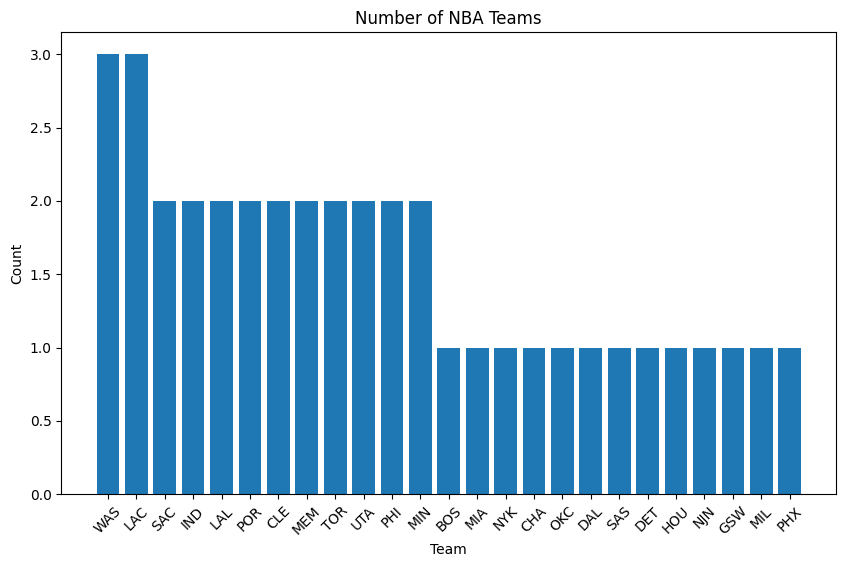

In [110]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of teams and their occurrences
team_counts = metrics_leaders_10['TEAM'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(team_counts.index, team_counts.values)
plt.xlabel('Team')
plt.ylabel('Count')
plt.title('Number of NBA Teams')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Univariate Data

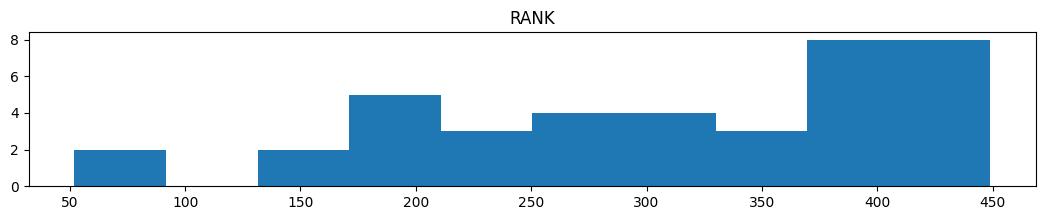

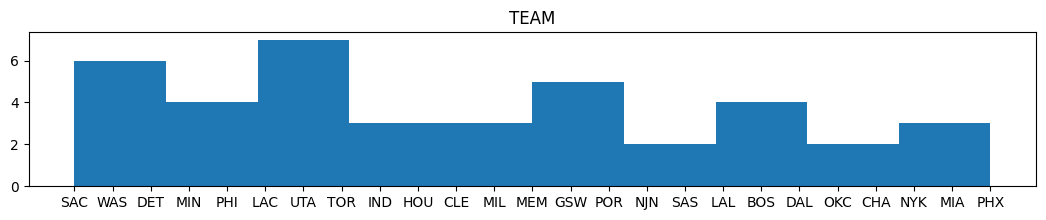

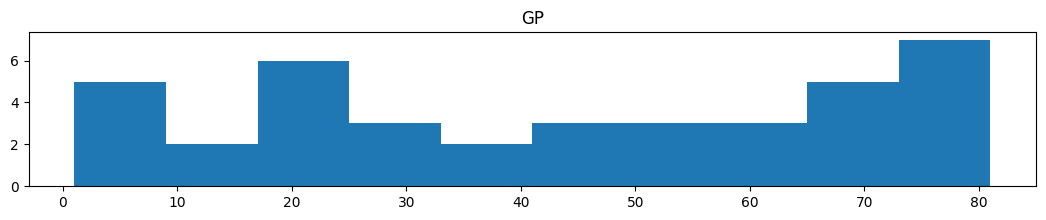

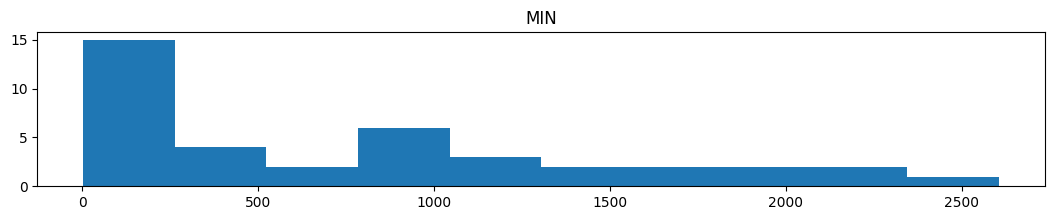

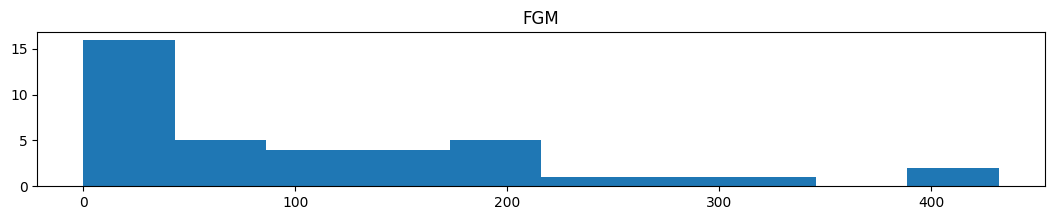

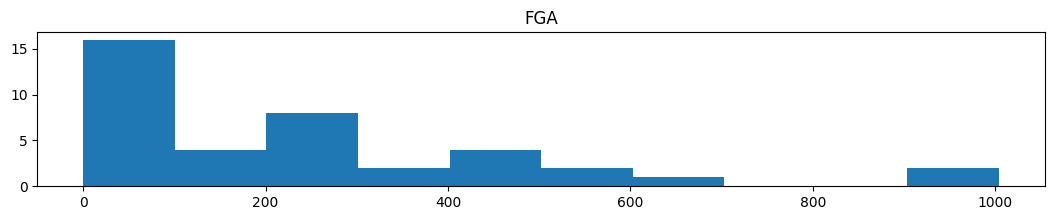

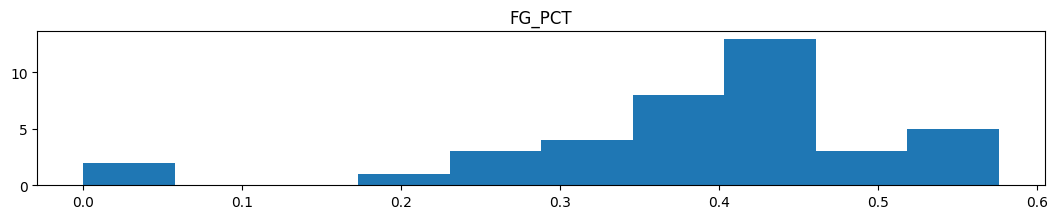

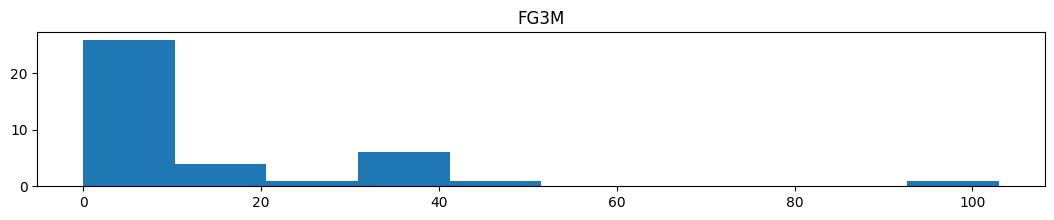

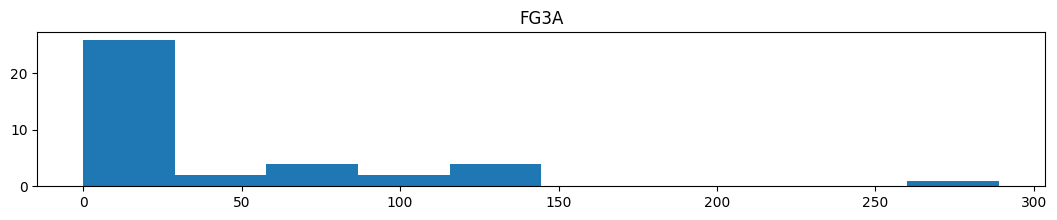

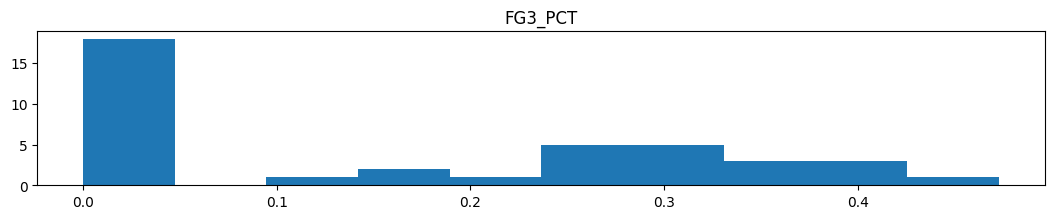

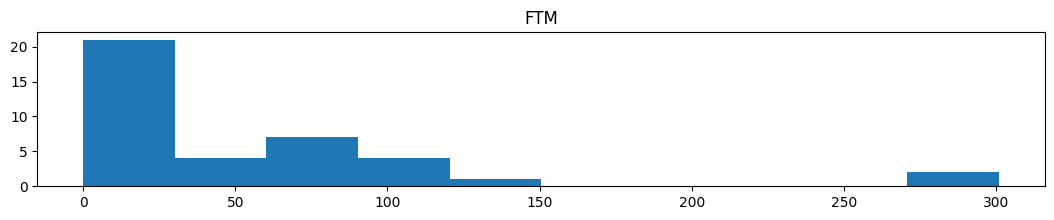

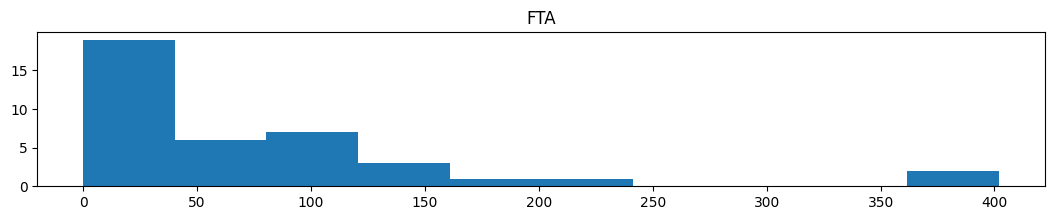

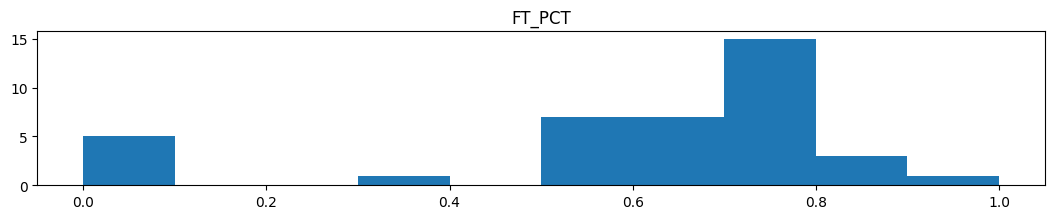

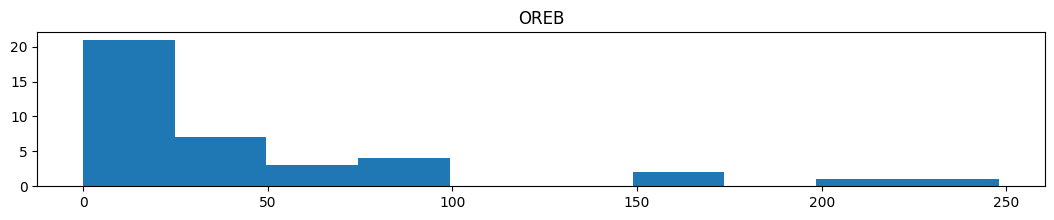

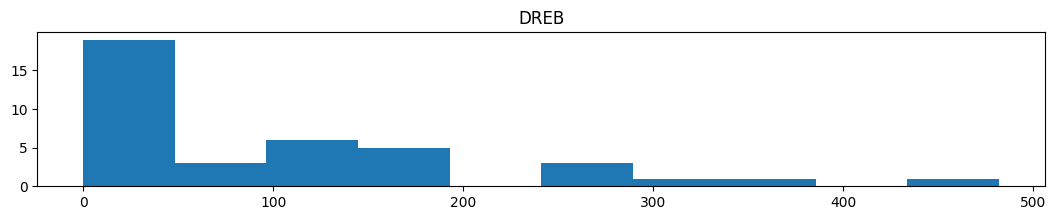

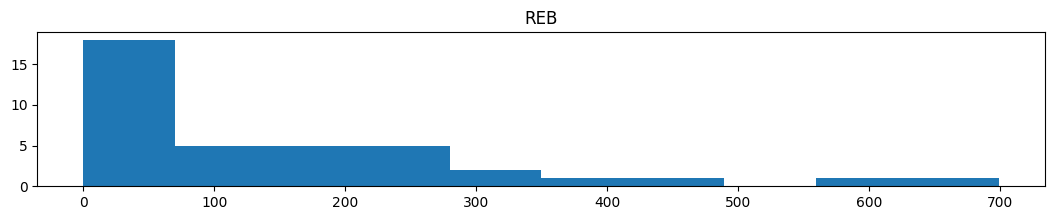

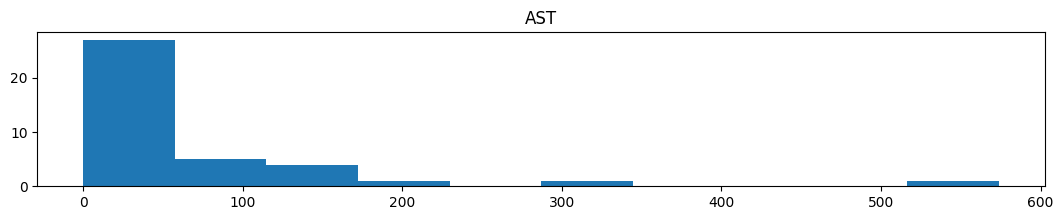

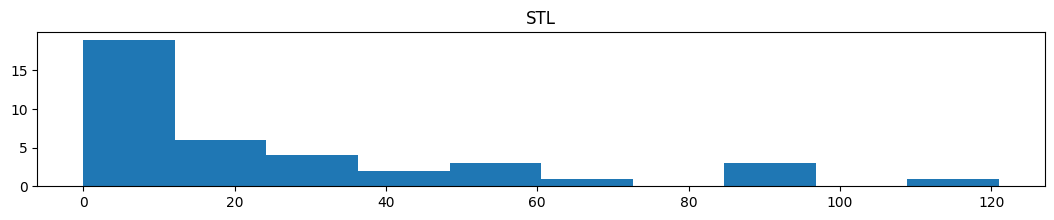

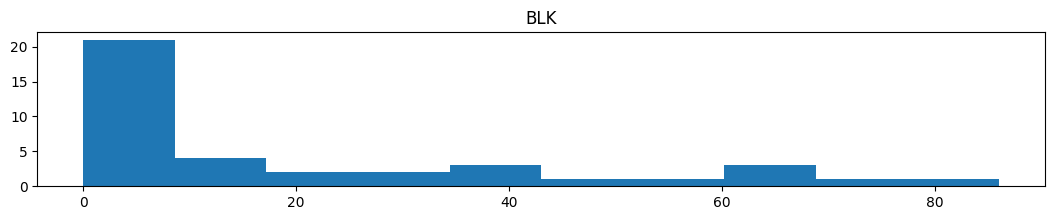

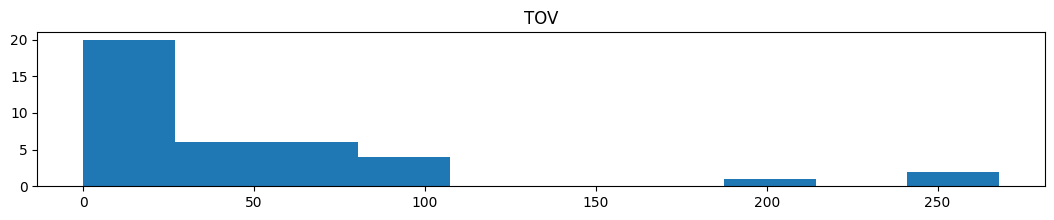

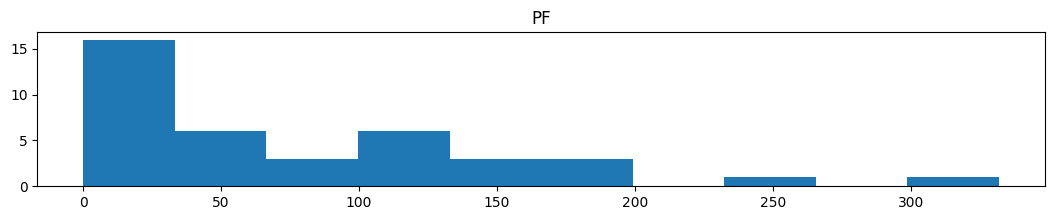

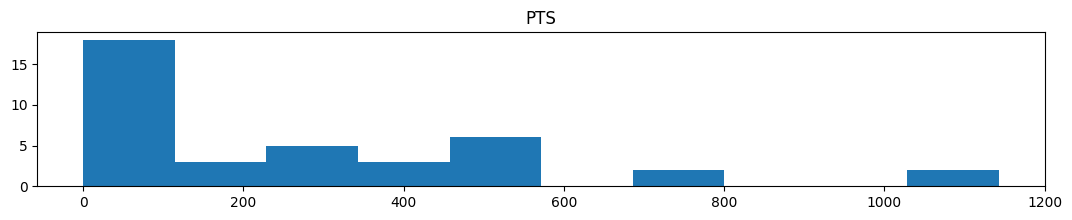

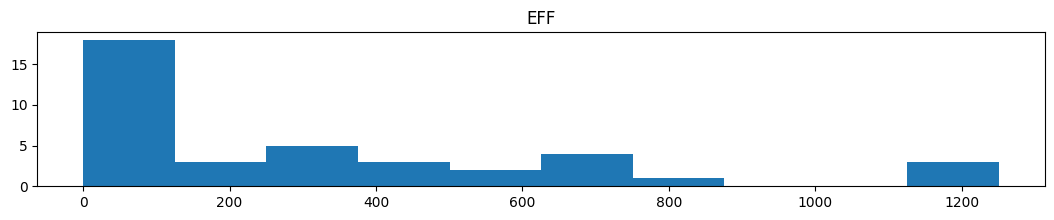

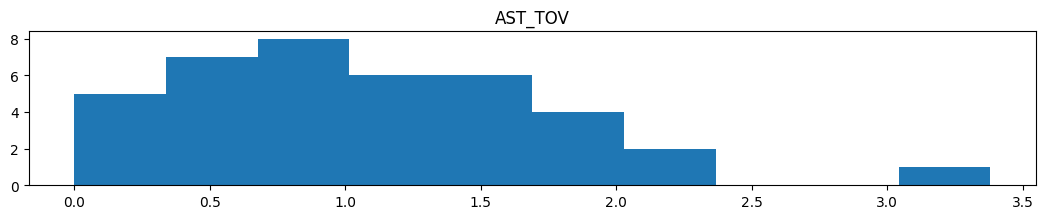

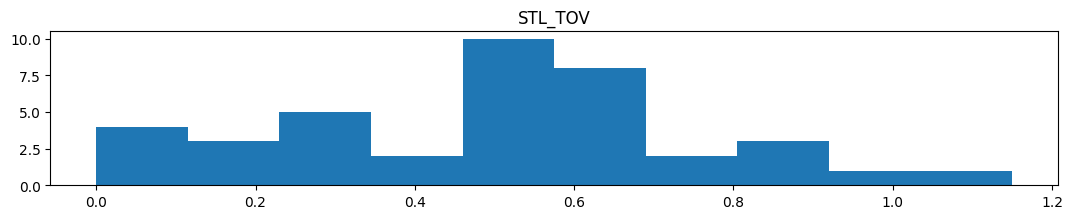

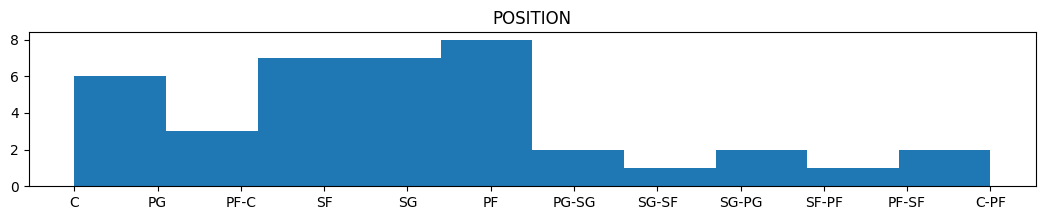

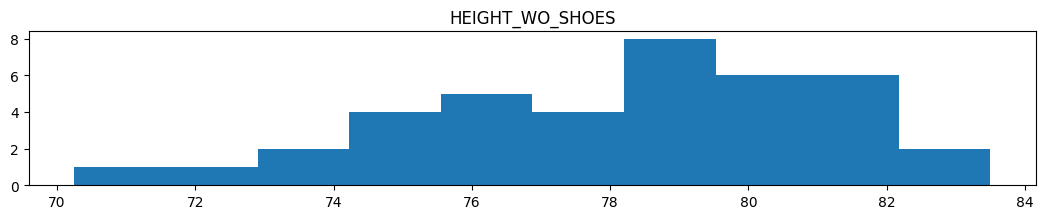

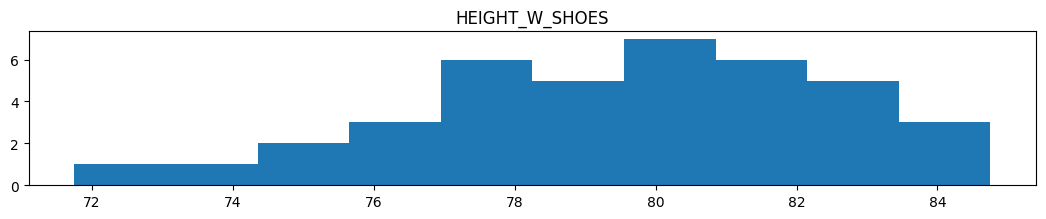

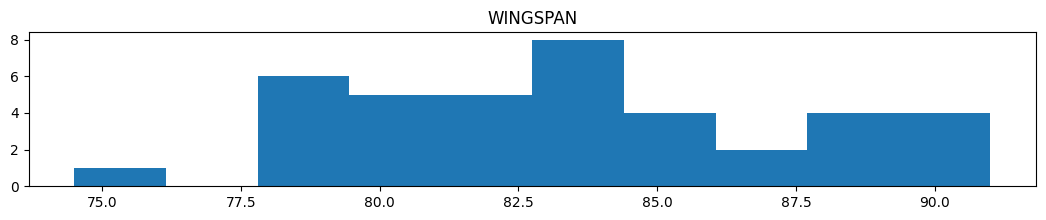

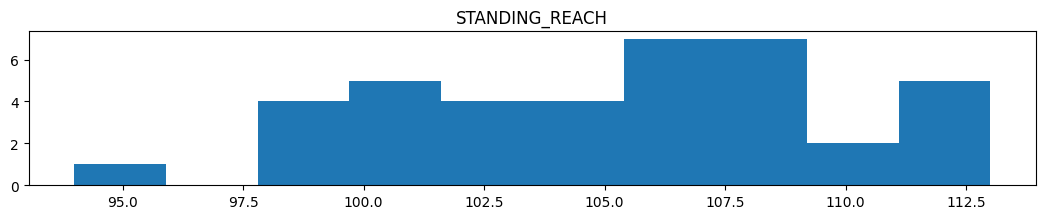

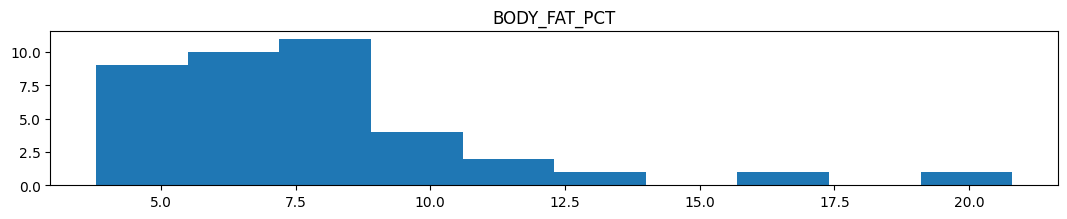

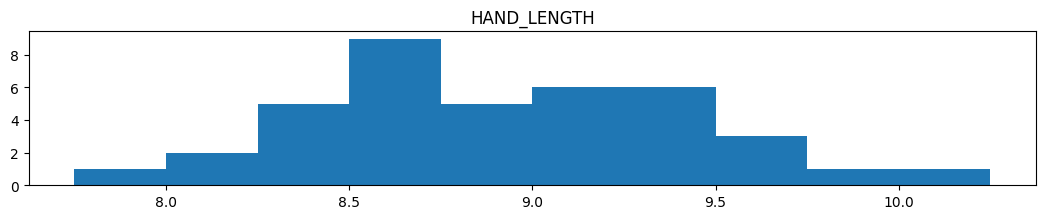

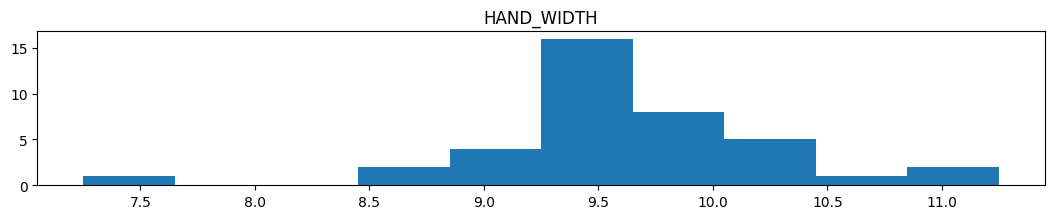

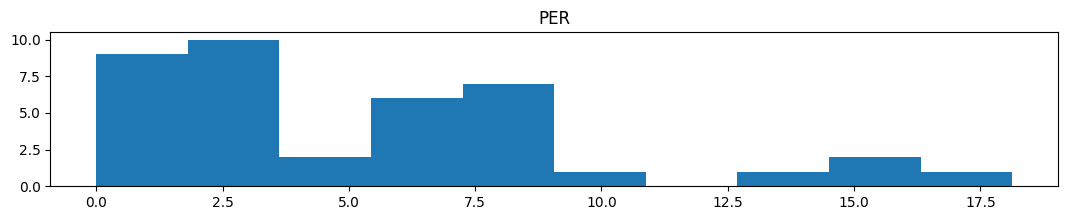

In [152]:
for col in metrics_leaders_10.drop(columns=['PLAYER']).columns:
    column_data = metrics_leaders_10[col].dropna()
    plt.figure(figsize=(13, 2))
    plt.hist(column_data)
    plt.title(col)
    plt.show()

## Correlation with stats

In [ ]:
# Grabbing just the anthro metrics from filtered dataframe
anthro_leaders_10 = metrics_leaders_10.iloc[:, 26:35]
anthro_leaders_10['PTS'] = metrics_leaders_10['PTS']

In [135]:
anthro_leaders_10['REB'] = metrics_leaders_10['REB']

,POSITION,HEIGHT_WO_SHOES,HEIGHT_W_SHOES,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,PER,PTS,REB
0,C,81.50,82.75,89.75,113.0,16.4,9.25,10.0,15.22,1143,699
1,PG,74.75,76.00,81.25,101.5,5.6,8.25,9.5,18.13,1131,317
2,PF-C,81.75,83.00,86.25,108.5,11.2,8.75,9.5,14.74,751,601
3,SF,78.25,79.25,85.00,106.0,4.6,9.00,9.5,8.54,709,240
4,SG,77.75,79.00,80.00,103.5,8.6,8.75,9.5,8.78,565,306


In [139]:
anthro_leaders_10['STL'] = metrics_leaders_10['STL']

In [142]:
anthro_leaders_10['AST'] = metrics_leaders_10['AST']

In [143]:
anthro_leaders_10['BLK'] = metrics_leaders_10['BLK']

In [146]:
anthro_leaders_10['FG3M'] = metrics_leaders_10['FG3M']

In [147]:
anthro_leaders_10.head()

,POSITION,HEIGHT_WO_SHOES,HEIGHT_W_SHOES,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,PER,PTS,REB,AST,STL,BLK,FG3M
0,C,81.50,82.75,89.75,113.0,16.4,9.25,10.0,15.22,1143,699,204,85,68,3
1,PG,74.75,76.00,81.25,101.5,5.6,8.25,9.5,18.13,1131,317,574,121,35,34
2,PF-C,81.75,83.00,86.25,108.5,11.2,8.75,9.5,14.74,751,601,105,93,45,0
3,SF,78.25,79.25,85.00,106.0,4.6,9.00,9.5,8.54,709,240,148,58,54,103
4,SG,77.75,79.00,80.00,103.5,8.6,8.75,9.5,8.78,565,306,159,49,14,14


/var/folders/qh/kjmdb2zx3n3b2ng_n4q3cyn00000gn/T/ipykernel_51029/3938413936.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = anthro_leaders_10.corr()


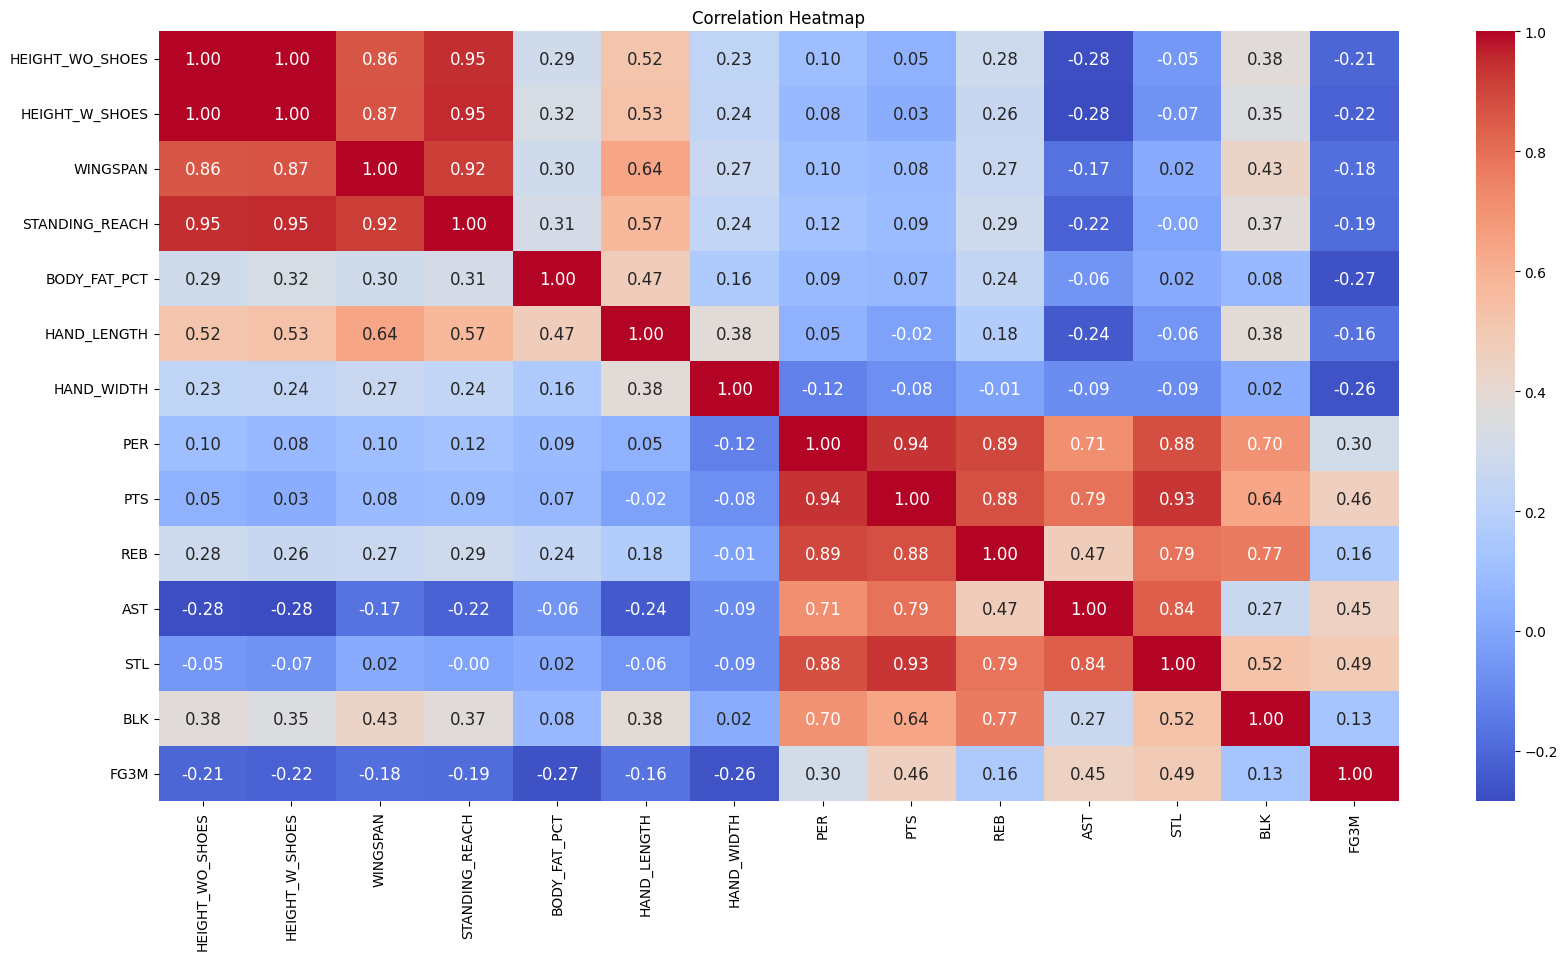

In [148]:
#visualization imports
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = anthro_leaders_10.corr()


# Create the heatmap with annotations
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()